In [1]:
import rasterio
import rasterio.features
import rasterio.warp

from rasterio.plot import show
from matplotlib import pyplot    
import geopandas

        


ESA2015campsector.tif


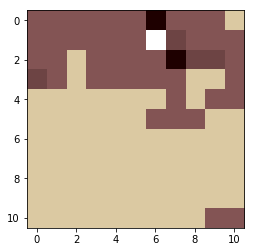

{'type': 'Polygon', 'coordinates': [[(31.522222, 4.827778), (31.522222, 4.797222), (31.552778, 4.797222), (31.552778, 4.827778), (31.522222, 4.827778)]]}
ESA2015campsectorZero.tif


C:\Users\Colossus\Anaconda3\envs\GeoProjects\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Colossus\Anaconda3\envs\GeoProjects\lib\site-packages\rasterio\features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


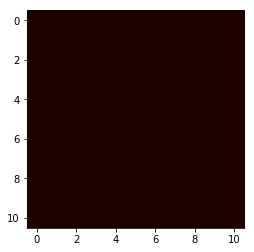

{'type': 'Polygon', 'coordinates': [[(31.522222, 4.827778), (31.522222, 4.797222), (31.552778, 4.797222), (31.552778, 4.827778), (31.522222, 4.827778)]]}
ESA2015homesector.tif


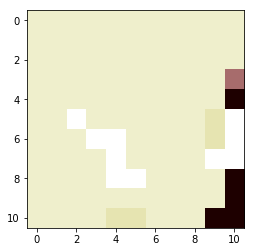

{'type': 'Polygon', 'coordinates': [[(-122.325, 47.666667), (-122.325, 47.636111), (-122.294444, 47.636111), (-122.294444, 47.666667), (-122.325, 47.666667)]]}
ESA2015homesectorZero.tif


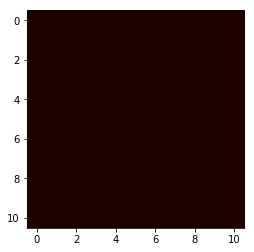

{'type': 'Polygon', 'coordinates': [[(-122.325, 47.666667), (-122.325, 47.636111), (-122.294444, 47.636111), (-122.294444, 47.666667), (-122.325, 47.666667)]]}
ESA2015region.tif


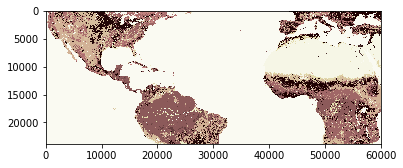

{'type': 'Polygon', 'coordinates': [[(-125.158333, 48.197222), (-125.158333, -17.983333), (41.452778, -17.983333), (41.452778, 48.197222), (-125.158333, 48.197222)]]}
ESA2015region2.tif


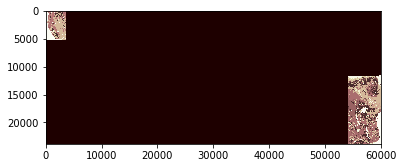

{'type': 'Polygon', 'coordinates': [[(-125.136111, 48.194444), (-125.136111, 46.902778), (-125.138889, 46.902778), (-125.138889, 45.133333), (-125.141667, 45.133333), (-125.141667, 43.363889), (-125.144444, 43.363889), (-125.144444, 41.594444), (-125.147222, 41.594444), (-125.147222, 39.825), (-125.15, 39.825), (-125.15, 38.055556), (-125.152778, 38.055556), (-125.152778, 36.286111), (-125.155556, 36.286111), (-125.155556, 34.516667), (-125.158333, 34.516667), (-125.158333, 33.783333), (-124.944444, 33.783333), (-124.944444, 33.780556), (-123.175, 33.780556), (-123.175, 33.777778), (-121.405556, 33.777778), (-121.405556, 33.775), (-119.636111, 33.775), (-119.636111, 33.772222), (-117.866667, 33.772222), (-117.866667, 33.769444), (-116.097222, 33.769444), (-116.097222, 33.766667), (-115.133333, 33.766667), (-115.133333, 33.938889), (-115.130556, 33.938889), (-115.130556, 35.708333), (-115.127778, 35.708333), (-115.127778, 37.477778), (-115.125, 37.477778), (-115.125, 39.247222), (-115.1

In [2]:
images = ["ESA2015campsector.tif", 
          "ESA2015campsectorZero.tif", 
          "ESA2015homesector.tif", 
          "ESA2015homesectorZero.tif", 
          "ESA2015region.tif",
          "ESA2015region2.tif"]
for image in images:
    print(image)

    with rasterio.open(image) as dataset:
        # Display the image
        pyplot.imshow(dataset.read(1), cmap='pink')
        pyplot.show()

        # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()

        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'EPSG:4326', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)